# Numerical Algorithms: From ODEs to PDEs

#### Overview:
In this notebook, we will continue our discussion on constructing numerical algorithms that can be used to solve differential equations. Here, we will consider the heat/diffusion equation - a fundamental partial differential equation and a key part of numerical ocean models.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Heat Equation

#### Differential Equation
Consider the function $f(x,t)$ which describes temperature as a function of both space ($x$) and time ($t$). The differential equation that describes the evolution of temperature through space and time is: 
$$
\frac{\partial f}{\partial t} = \kappa \frac{\partial^2 f}{\partial x^2}
$$

In this equation, we see that the derivative in time ($\partial f/\partial t$) is related to the second derivative in space ($\partial^2 f/\partial x^2$). This is an example of a *partial differential equation*. By contrast, an *ordinary* differential equation is one which considers derivatives in one dimension, such as space or time.


It's important to note that we've used calculus symbols to reflect the physics, but they reflect the intuitive explanation that the total change in heat must be equal to the heat that enters minus the heat that goes out. In this sense, when viewing the equation above, it's helpful to consider what the symbols mean from a physical standpoint to help guide intuition about what the solution may look like.

#### Initial Conditions
Just as for ordinary differential equations, we also need to have an initial condition to solve partial differential equations. In the case of the heat equation, this condition is the full profile of temperature through the rod.

Let's consider a scenario where we use a blow torch to heat up a rod of temperature $10^{\circ}$C in the middle of a rod by $2^{\circ}$C. We can visualize this by defining an $x$ grid for ourselves and estimating this with a bell curve-like shape:

In [2]:
# define a 10 m grid between -5 and 5
x_min = -5.0 
x_max = 5.0 

# define a spatial step
dx = 0.1

# compute the number of points on the x grid
nx = int((x_max-x_min)/dx) + 1 

# define the x grid
x = np.linspace(x_min, x_max, nx)

# estimate initial conditions
T_0 = 2*np.exp(-(x**2)/0.25) + 10

Let's make a plot of the initial conditions to visualize:

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/pp/fqn1w6qs21s6c54hyr65jbwr0000gs/T/ipykernel_35179/2889824370.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Temperature ($^{\circ}$C)')


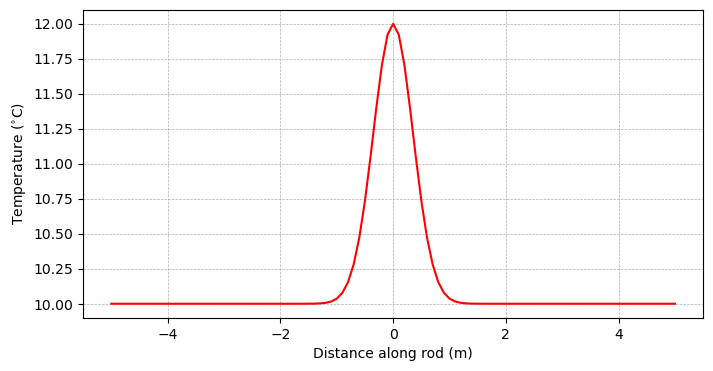

In [6]:
# make a plot of the initial conditions
fig = plt.figure(figsize=(8,4))

# enter plotting line here
plt.plot(x, T_0, 'r-')
# format axes
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Distance along rod (m)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

#### &#x1F914; Questions for consideration:
1. How do we expect the temperature of the rod to evolve through time?
2. What happens when excess heat gets to the end of the rod?

### Boundary Conditions
When solving PDEs, we are often working in a regional domain. In this case, the rod has a finite length - 10 meters. Since there are edges in our solution, we additionally need to consider the conditions at the boundary. This can be done in several ways.

#### Dirichlet Boundary Conditions
One options for the boundary is that it is kept at a constant temperature - maybe there are 10$^{\circ}$ C temperature plates that ensure the edges are always kept at 10$^{\circ}$C. In this case, the boundary conditions are:

$$
f(x=-5, t) = f(x=5, t) = 10^{\circ}\text{C}
$$

#### Neumann Boundary Conditions
Another option for the boundary is that the flux is kept constant - maybe there are perfectly insulated end caps that don't allow heat to escape. In this case, the boundary conditions are:

$$
\frac{\partial}{\partial x}f(x=-5, t) = \frac{\partial}{\partial x}f(x=5, t) = 0
$$

These are two of the more common boundary conditions but others could be considered. When we solve for our temperature evolution through time, we will see where we need the boundary conditions.

## Discretizing the solution
It turns out that the general solution to the heat equation is quite "involved" and most solutions turn toward approximating it with Fourier series. In other words, writing an analytical expression to solve the heat equation is a messy affair.

Here, we will use our finite difference methods to find a way to model the evolution of heat in our rod. Recall that the forward difference for the first derivative is

$$
y'(t) \approx \frac{y(t+\Delta t) - y(t)}{\Delta t}
$$

Similarly, a finite difference for the second derivative is:

$$
y''(t) \approx \frac{y(t+\Delta t) - 2y(t) + y(t-\Delta t)}{\Delta t^2}
$$

Putting this together, we can **discretize** the heat equation 

$$
\frac{\partial f}{\partial t} = \kappa \frac{\partial^2 f}{\partial x^2}
$$

as:

$$
\frac{f(t+\Delta t,x) - f(t,x)}{\Delta t} = \kappa \frac{f(t,x+\Delta x) - 2 f(t,x) + f(t,x-\Delta x)}{\Delta x^2}
$$

This gives us a way to look into the future and model the evolution by solving for next time step:

$$
f(t+\Delta t,x) =  f(t,x) +\Delta t \kappa \frac{f(t,x+\Delta x) - 2 f(t,x) + f(t,x-\Delta x)}{\Delta x^2}
$$

In words: the profile of temperature in the rod at a time in the future ($f(t+\Delta t,x)$) is the temperature of the rod now ($f(t,x)$) plus some changes associated with how temperature has changed spatially in the rod over this time.

## Coding up the solution

To code up the solution, we'll first need to set up a time array for ourselves, similar to the spatial array we constructed above:

In [4]:
# starting and ending times (seconds)
t_min = 0.0 
t_max = 100.0

# time step
dt = 0.025

# compute number of timesteps
nt = int((t_max-t_min)/dt) + 1 #number of points on t grid

Now, we can work on coding up the numerical model:

In [5]:
# make a grid to store the solution
T = np.zeros((nt, nx))

# define kappa (diffusion coefficient)
kappa = 0.1 

# establish initial conditions
T[0, :] = T_0

#### build and run the numerical model here:

# loop through each time step up until the last one
for j in range(nt-1):
    
    # loop through each space step to update the temperature
    # dont include the boundaries
    for i in range(1,len(x)-1): 
        T[j+1, i] = T[j, i] + dt*kappa*(T[j, i+1] - 2*T[j, i] + T[j,i-1])/(dx**2)

    # now, address the boundary conditions
    T[j+1, 0] = T[j+1, 1]
    T[j+1, -1] = T[j+1, -2]
    

Now that we've got a solution, let's take a look at the solution at a few time steps. Since there are lots of timesteps, let's choose to plot at only a few snapshots

<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
/var/folders/pp/fqn1w6qs21s6c54hyr65jbwr0000gs/T/ipykernel_57097/3691410023.py:29: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Temperature ($^{\circ}$C)')


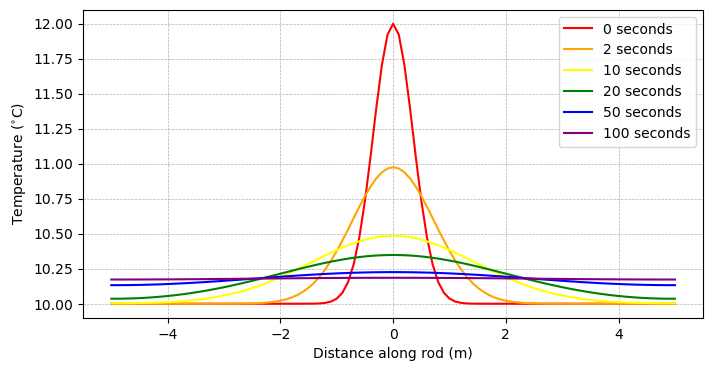

In [6]:
# make a plot of the initial conditions
fig = plt.figure(figsize=(8,4))

# plot initial conditions
plt.plot(x, T_0, 'r-', label='0 seconds')

# plot conditions at 2 seconds
time_index = int(2/dt)
plt.plot(x, T[time_index,:], '-', color='orange', label='2 seconds')

# plot conditions at 10 seconds
time_index = int(10/dt)
plt.plot(x, T[time_index,:], '-', color='yellow', label='10 seconds')

# plot conditions at 20 seconds
time_index = int(20/dt)
plt.plot(x, T[time_index,:], '-', color='green', label='20 seconds')

# plot conditions at 10 seconds
time_index = int(50/dt)
plt.plot(x, T[time_index,:], '-', color='blue', label='50 seconds')

# plot conditions at 20 seconds
time_index = int(100/dt)
plt.plot(x, T[time_index,:], '-', color='purple', label='100 seconds')

# format axes
plt.legend()
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Distance along rod (m)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

#### &#x1F914; Question for consideration:
What happens if we take longer timesteps?

### The Courant-Friedrichs-Lewy Condition
The Courant-Friedrichs-Lewy condition, or the "CFL condition" for short, describes how your time-stepping and spatial discretation but must related in order to maintain a stable solution.

For the diffusion scheme in use here, the CFL condition is:

$$
\frac{\kappa \Delta t}{\Delta x^2} < \frac{1}{2}
$$

#### &#x1F914; Questions for consideration:
1. Is CFL condtion satisfied when $\Delta t = 0.025$ s? $0.25$ s?
2. Suppose you construct an ocean model and determine the spatial resolution is not sufficient to capture the diffusive processes you are interested in. You decide to increase your spatial resolution by a factor of 2. How must your time step change to accomodate this difference?

In [11]:
# compute the CFL condition for the timesteps here
# keep kappa and delta x the same as in the example above

# delta t = 0.025
if kappa*0.025/(dx**2) < 0.5:
    print('CFL is all good')
else:
    print('CFL is violated')

# delta t = 0.25
if kappa*0.25/(dx**2) < 0.5:
    print('CFL is all good')
else:
    print('CFL is violated')

CFL is all good
CFL is violated


## The Heat Equation as a Diffusion Equation

Fundamentally, diffusion of particles in a fluid follow similar physical principles as the diffusion of heat in a medium. In this sense, the "heat" equation can also be considered a "diffusion" equation. 

This will be important when we start to consider how salinity varies in the ocean. We could similarly consider the same problem as above with salty water in the middle of a pipe. The evolution of salt $S$ would similarly be given by

$$
\frac{\partial S}{\partial t} = \kappa \frac{\partial^2 S}{\partial x^2}
$$

For temperature, $\kappa$ is a ratio of heat capacity coefficient relative to coefficient for heat conduction. The can be consider a thermal diffusivity coefficient describing how fast heat diffuses in water. For salinity, $\kappa$ is a diffusion coefficent describing how fast salt diffuses in water.



#### &#x1F914; Question for consideration:
In water, the heat diffusion coefficient is $O(10^{-3}$) while the salt diffusion coefficient is $O(10^{-9}$). Which diffuses faster - heat or salt?

#### If there's time:
Two options:
1. Change the boundary conditions in the solution above
2. Change the initial conditions in the solution above